<a href="https://colab.research.google.com/github/rahatmoktadir03/DataCamp-Projects/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [ ]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [ ]:
## Question 1: Which hour has the highest frequency of crimes?
# Ensure 'TIME OCC' is padded with leading zeros to four digits (e.g., '620' becomes '0620')
# This allows for consistent slicing to extract the hour.
crimes['TIME OCC Padded'] = crimes['TIME OCC'].str.zfill(4)
# Extract the hour (first two characters) and convert to integer
crimes['Hour Occurred'] = crimes['TIME OCC Padded'].str.slice(0, 2).astype(int)
# Find the hour with the highest frequency
peak_crime_hour = crimes['Hour Occurred'].mode()[0]

print(f"The hour with the highest frequency of crimes is: {peak_crime_hour}\n")

The hour with the highest frequency of crimes is: 12



In [ ]:
## Question 2: Which area has the largest frequency of night crimes?
# Night crimes are defined as occurring between 10 PM (2200) and 3:59 AM (0359).
# Filter crimes based on the 'TIME OCC' column.
# Convert 'TIME OCC' back to integer for numerical comparison, as it was read as string initially.
crimes['TIME OCC Int'] = crimes['TIME OCC'].astype(int)

night_crimes_df = crimes[
    (crimes['TIME OCC Int'] >= 2200) | (crimes['TIME OCC Int'] <= 359)
]
# Find the area name with the highest frequency of night crimes
peak_night_crime_location = night_crimes_df['AREA NAME'].mode()[0]

print(f"The area with the largest frequency of night crimes is: {peak_night_crime_location}\n")

The area with the largest frequency of night crimes is: Central



In [ ]:
## Question 3: Identify the number of crimes committed against victims of different age groups.
# Define age group bins and corresponding labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf] # np.inf for the '65+' open-ended bin
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Categorize 'Vict Age' into the defined age groups
# `right=True` means the rightmost bin edge is inclusive (e.g., 17 is in 0-17)
# `include_lowest=True` ensures that the lowest value (0) is included
crimes['Victim Age Group'] = pd.cut(
    crimes['Vict Age'],
    bins=age_bins,
    labels=age_labels,
    right=True,
    include_lowest=True
)

# Count the frequency of crimes for each age group
# .sort_index() ensures the age groups are in the defined order
victim_ages = crimes['Victim Age Group'].value_counts().sort_index()

print("Number of crimes committed against victims of different age groups:\n")
print(victim_ages)

Number of crimes committed against victims of different age groups:

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Victim Age Group, dtype: int64


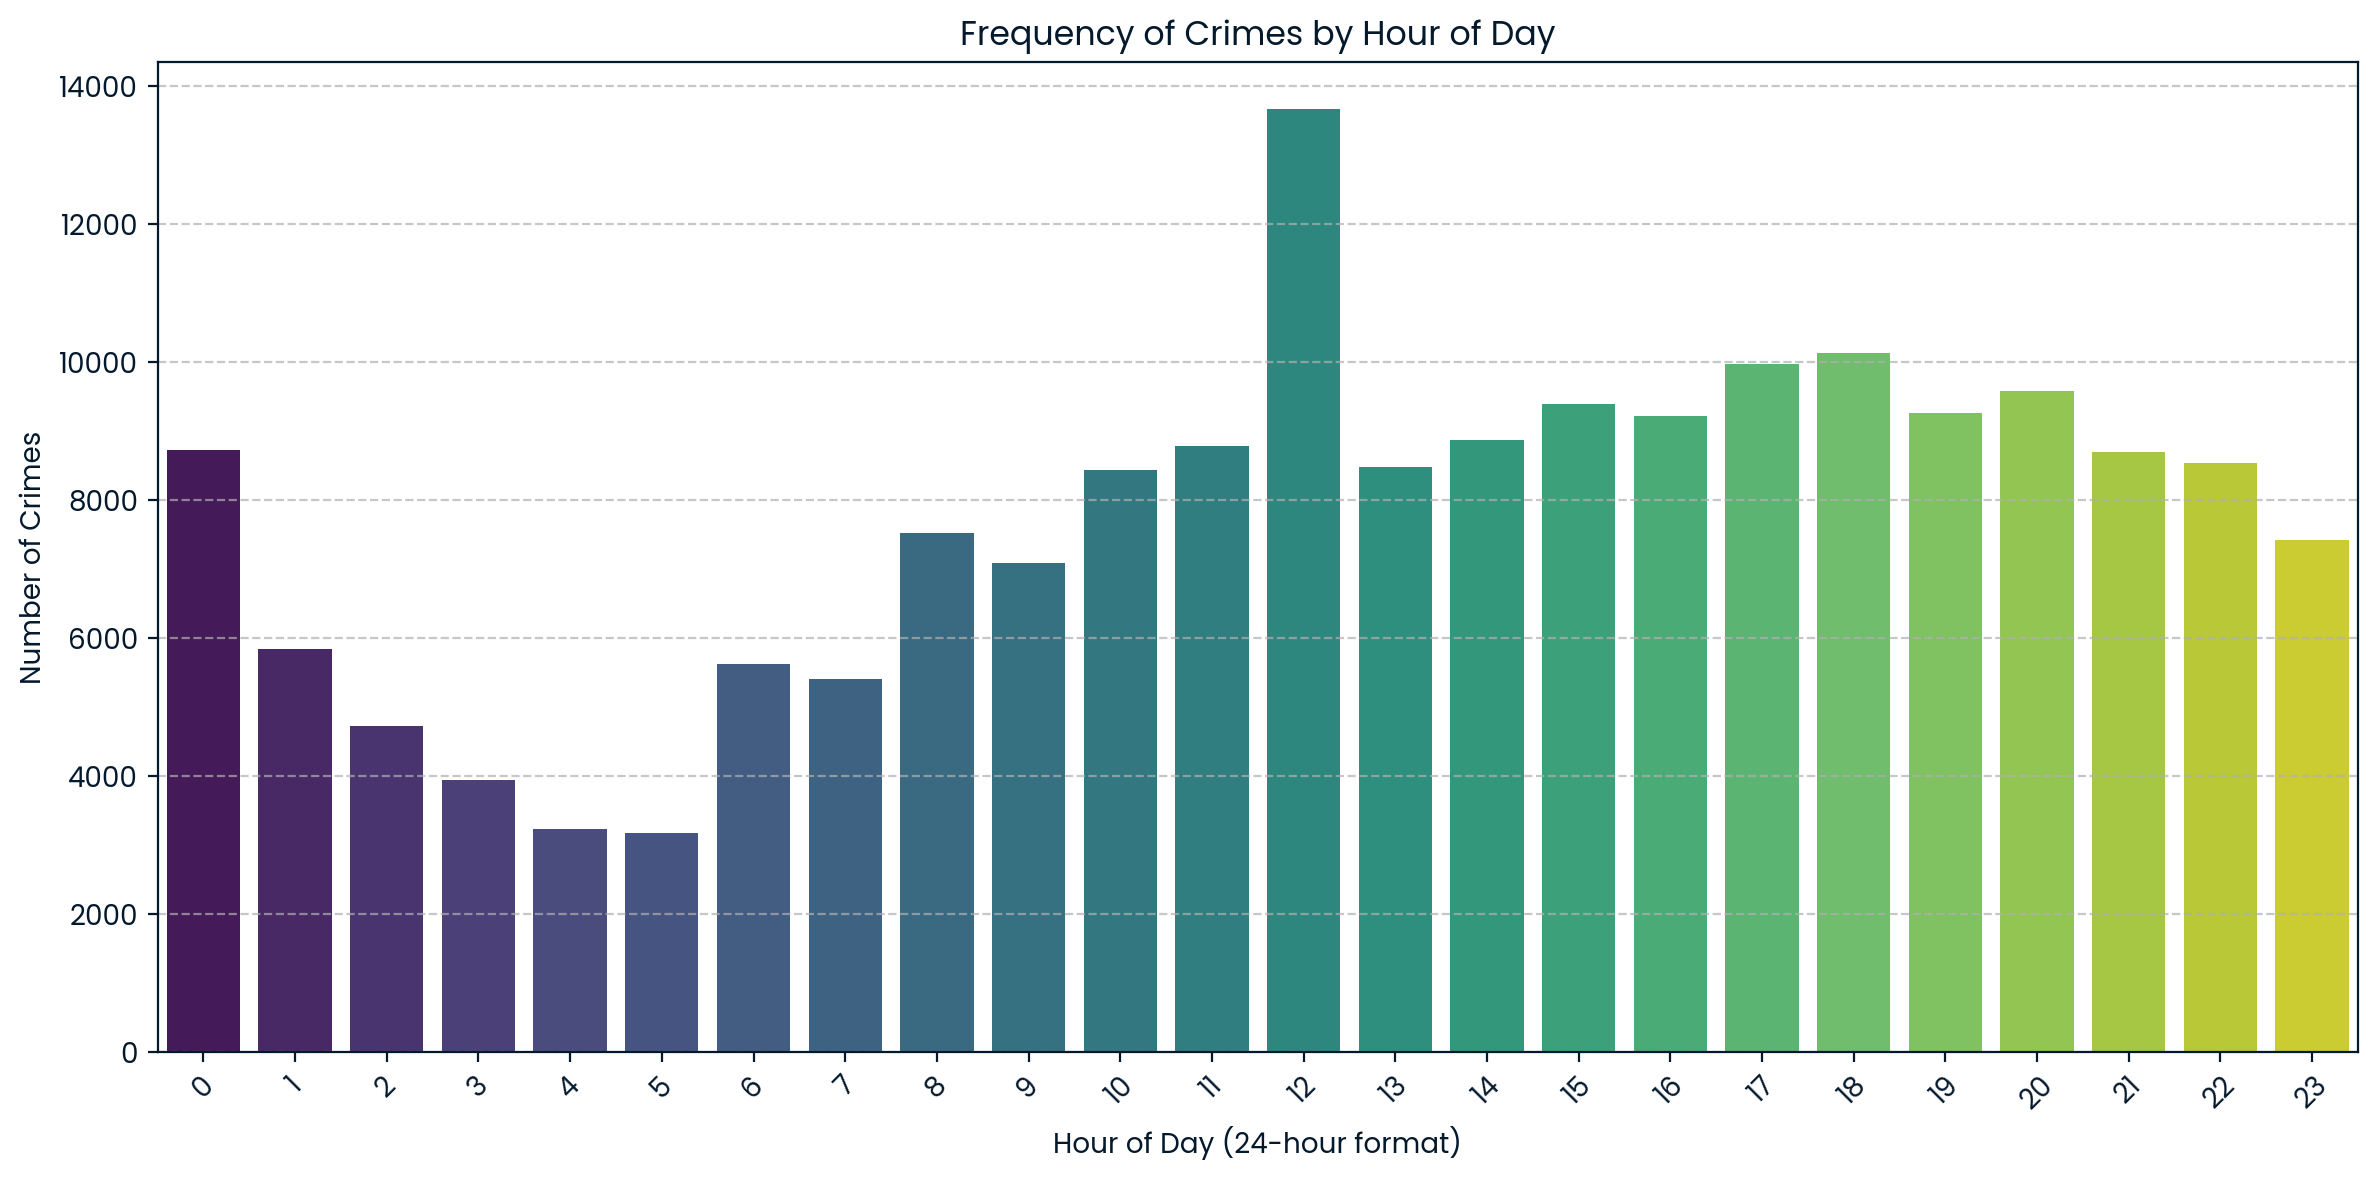

In [ ]:
## Bar Graph: Frequency of Crimes by Hour
plt.figure(figsize=(12, 6))
# Calculate the frequency of crimes for each hour
hourly_crime_counts = crimes['Hour Occurred'].value_counts().sort_index()
sns.barplot(x=hourly_crime_counts.index, y=hourly_crime_counts.values, palette='viridis')
plt.title('Frequency of Crimes by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

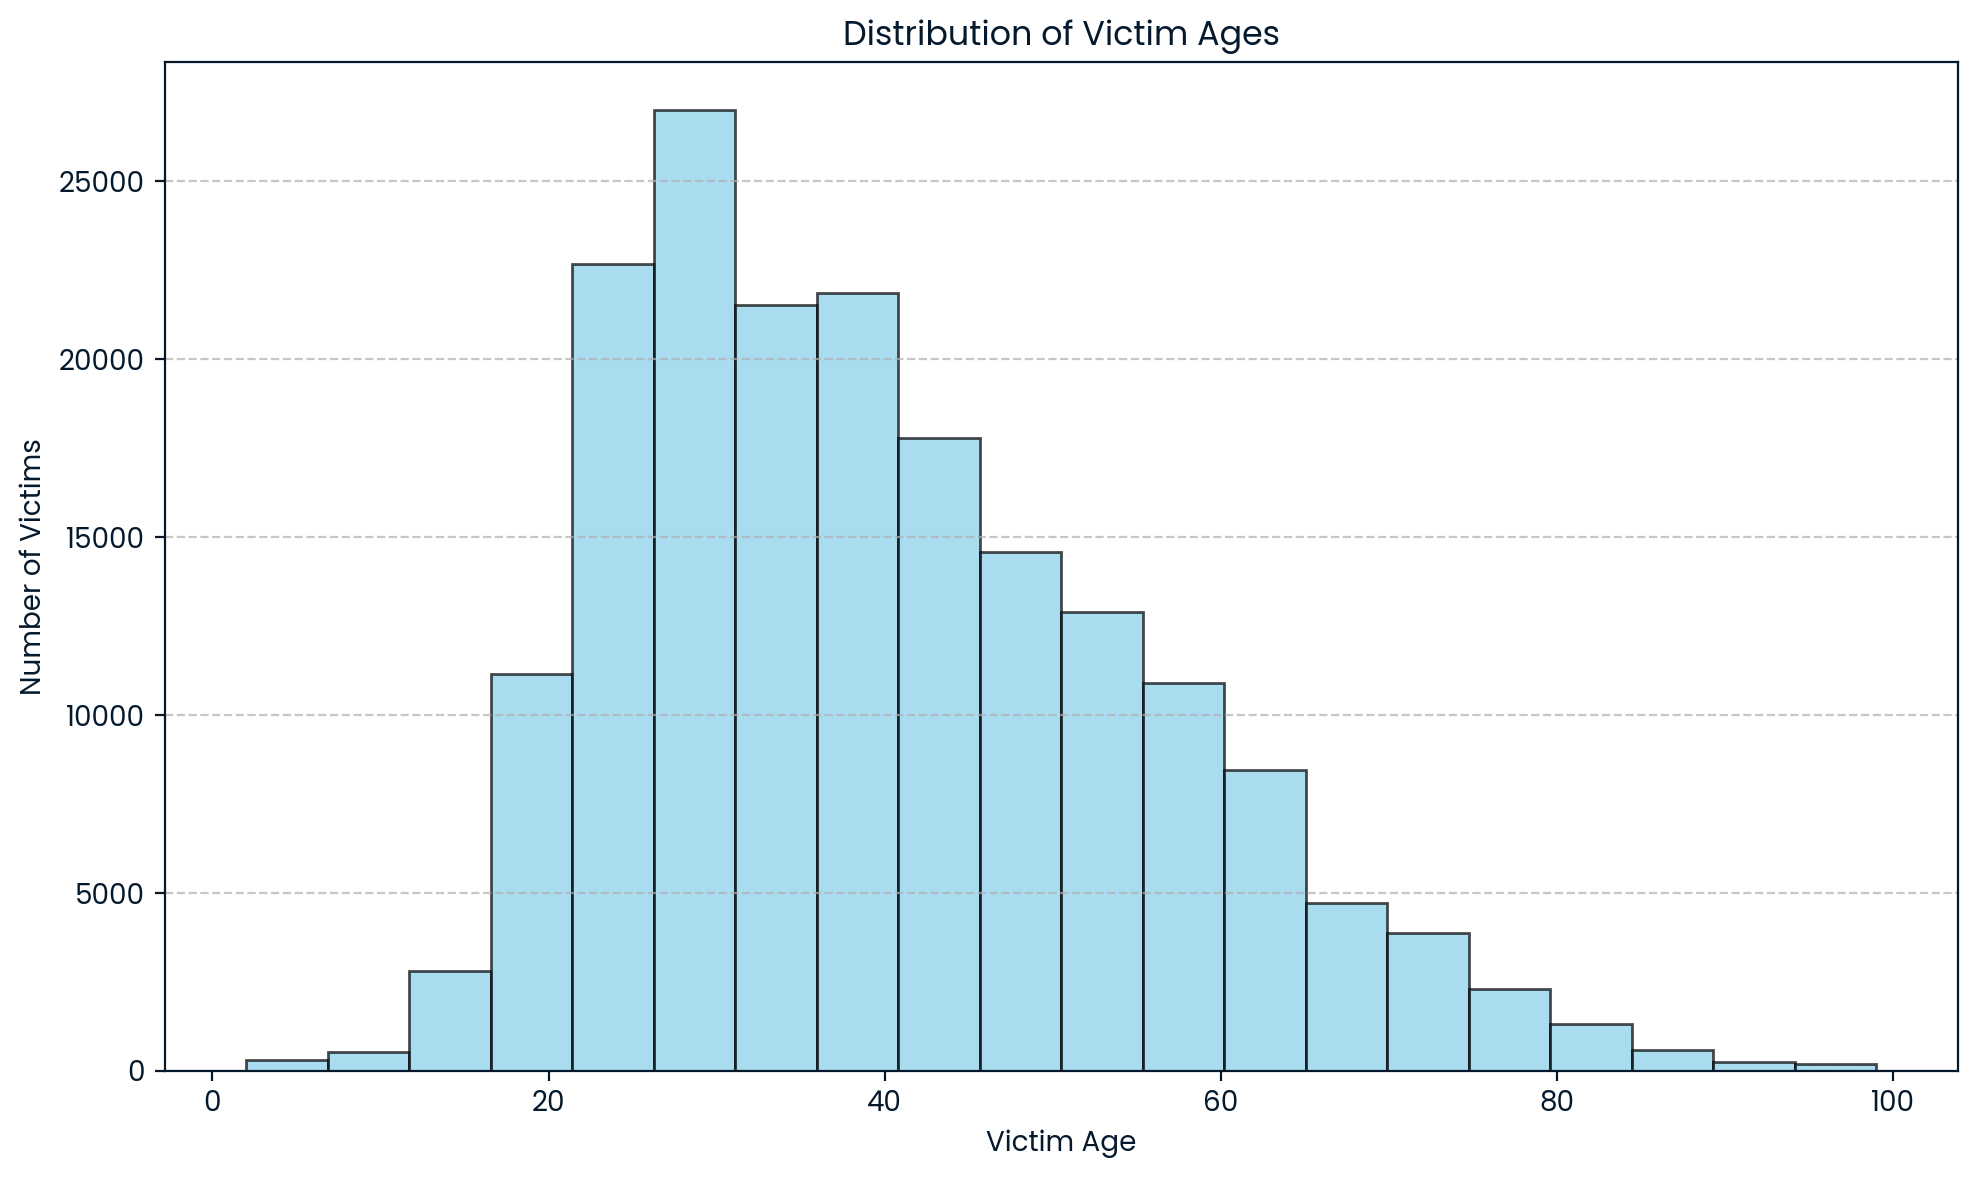

In [ ]:
## Histogram: Distribution of Victim Ages
plt.figure(figsize=(10, 6))
# Plot a histogram of the 'Vict Age' column.
# Drop NaN values in 'Vict Age' before plotting to avoid errors.
plt.hist(crimes['Vict Age'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution of Victim Ages')
plt.xlabel('Victim Age')
plt.ylabel('Number of Victims')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

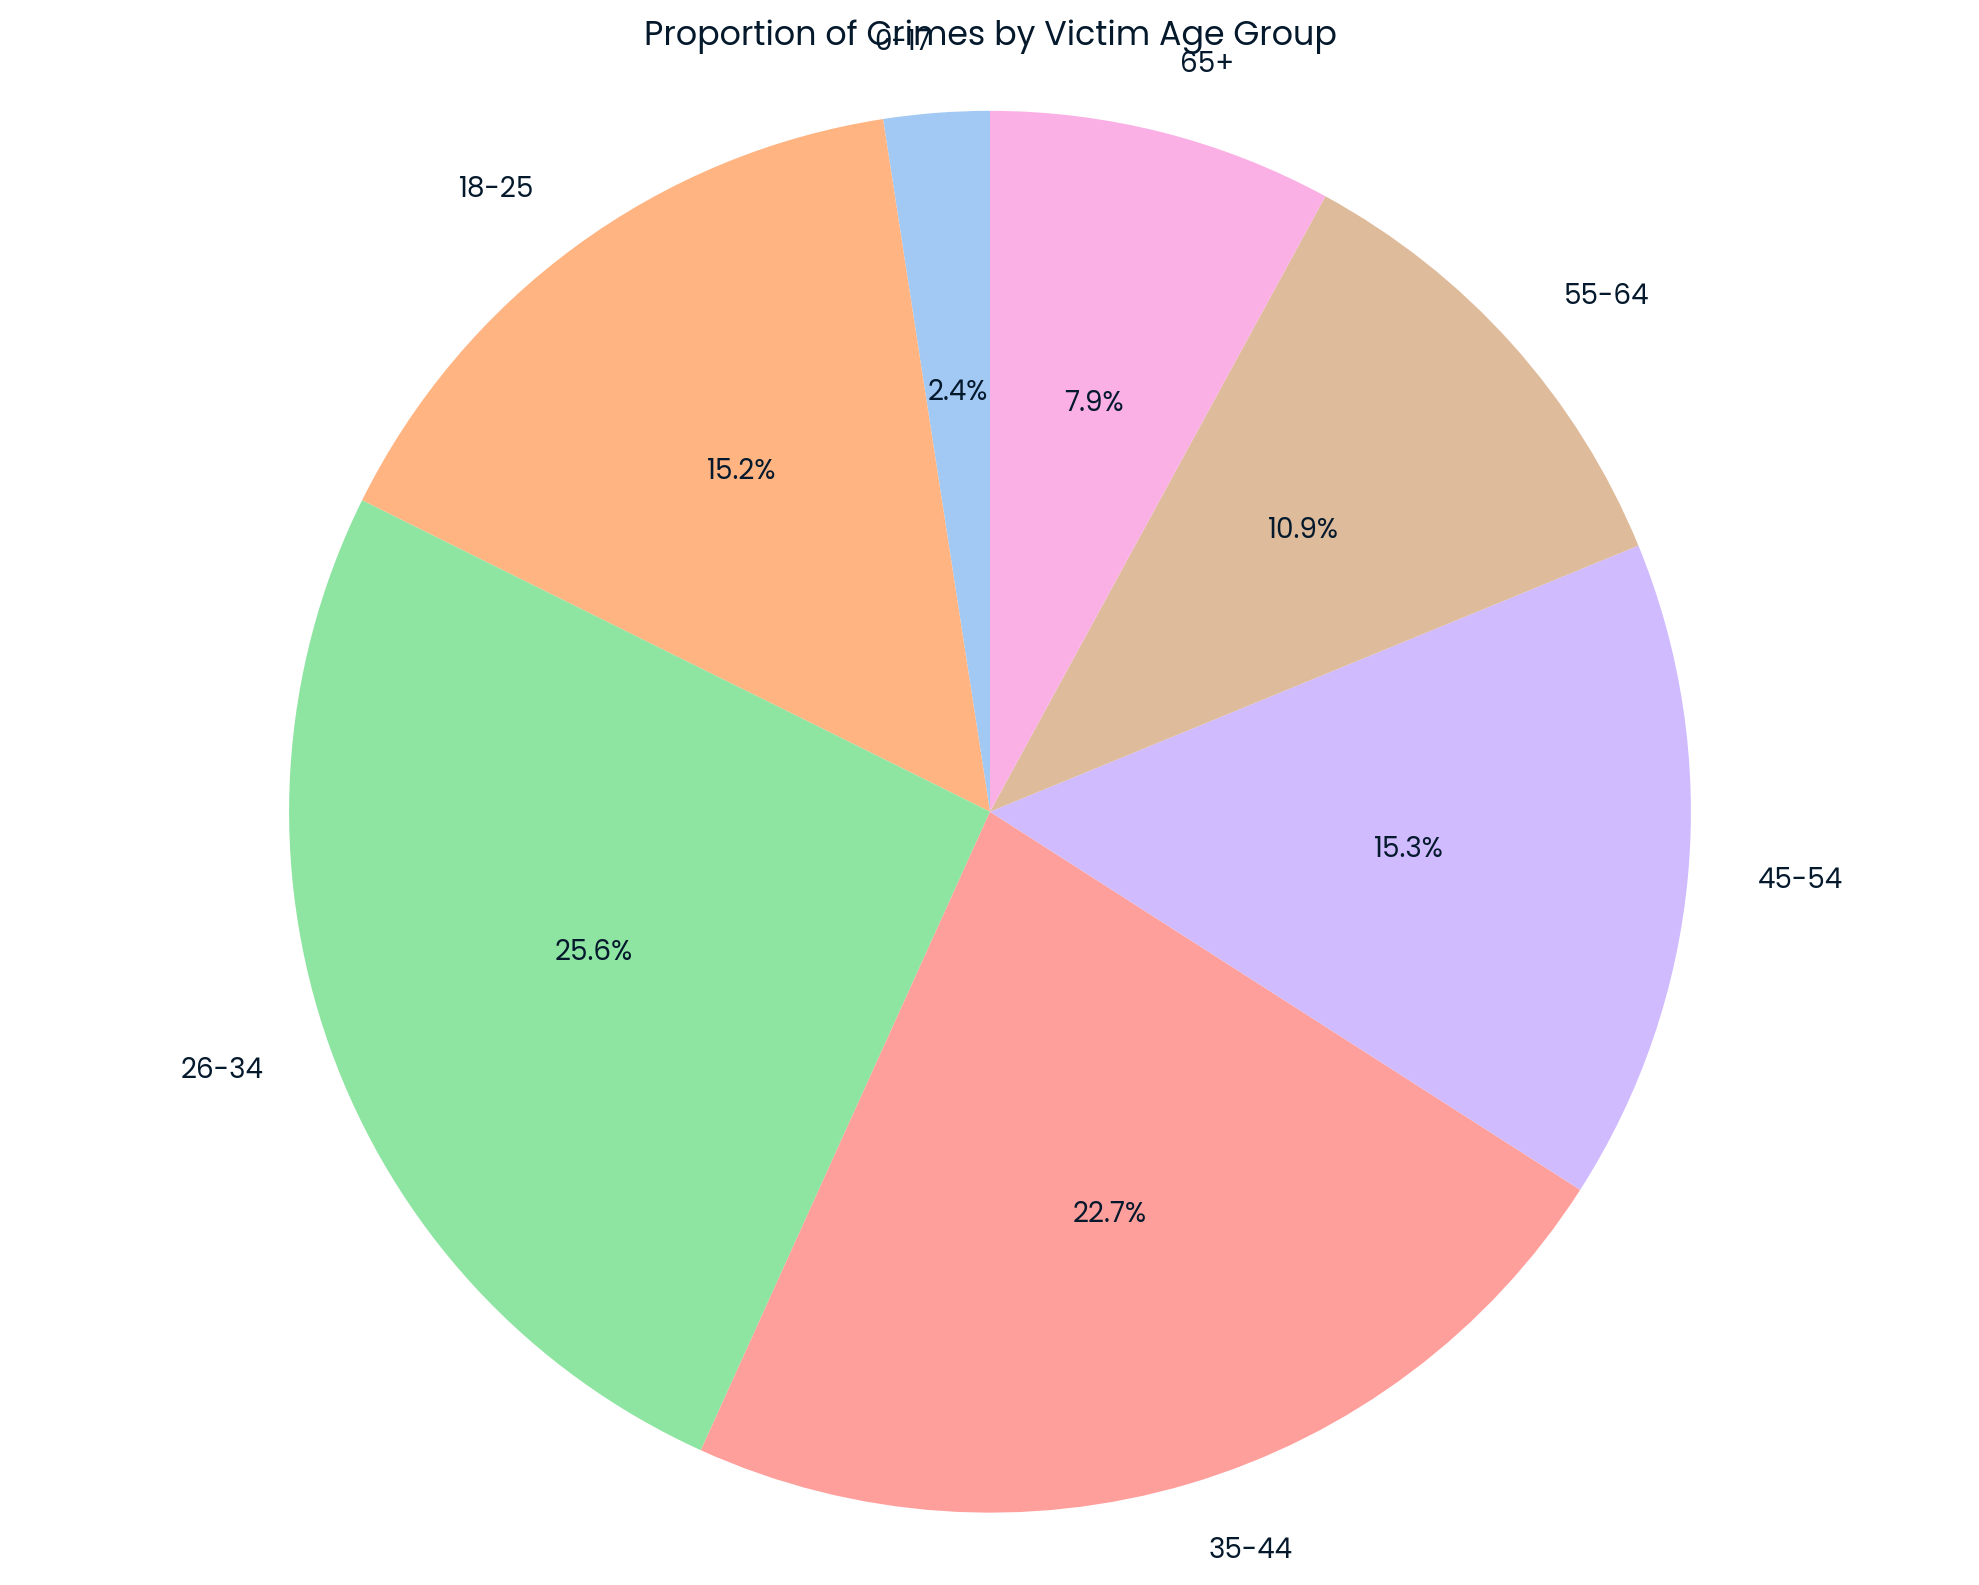

In [ ]:
## Pie Chart: Crimes by Victim Age Group
plt.figure(figsize=(10, 8))
# Use the 'victim_ages' Series calculated earlier for the pie chart.
# autopct='%1.1f%%' displays the percentage on the slices.
# startangle=90 starts the first slice at the top.
plt.pie(victim_ages, labels=victim_ages.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Crimes by Victim Age Group')
plt.axis('equal') # Ensures the pie chart is circular.
plt.tight_layout()
plt.show()